## Shopping Mall Customer Segmentation


### Content
We're having a dataset of shopping mall customers which contains their gender, age, annual income and spending score "this is basically a score from 1-100 based on how much the customer is spending his/her money and their behaviors". 
### Objective
Our main target here is to devide these customers into groups and recommend to the business which group of them we should target their campaigns to. As well as finding insightful info about our customer in general to develop their buying behaiviors.
### Table of Content
- EDA (Exploratory Data Analysis)
- Clustering Algorithim.
- Summary statistics on the clusters.


In [114]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #Normalizing data
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Loading and cleaning data:

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
df.shape[0] #200 row
df.info() #no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.duplicated().sum() #no duplicated rows in the dataset

0

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### Exploratory Data Analysis

#### Univariate Analysis

In [34]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

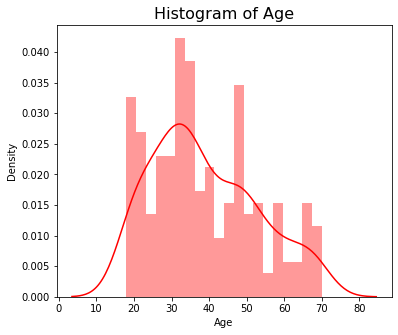

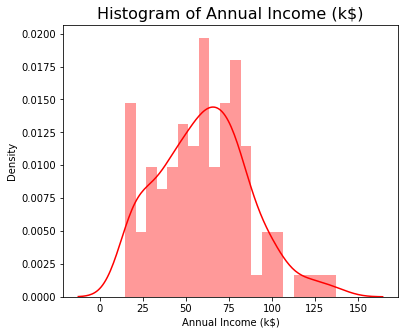

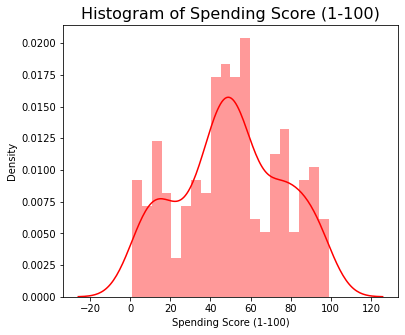

In [79]:
#I will create visuals from analyzing th 'Age', 'Annual Income columns', 'Spending Score (1-100)'
Col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in Col:
  plt.figure(figsize = (6,5))
  plt.title(f'Histogram of {i}', fontsize=16)
  sn.set_palette("Set1")
  sn.distplot(df[i],bins=20,color='red');

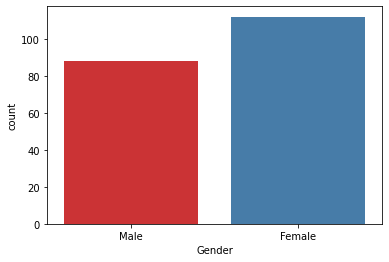

In [78]:
sn.countplot(df['Gender']);

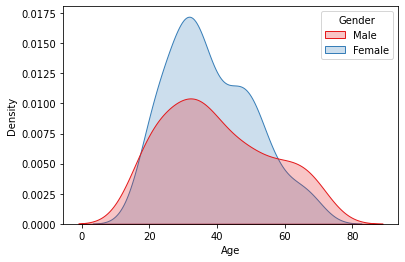

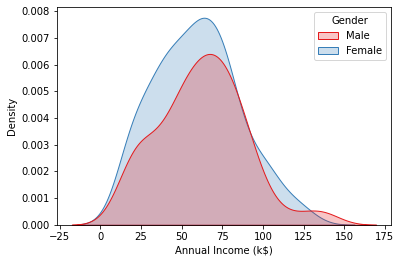

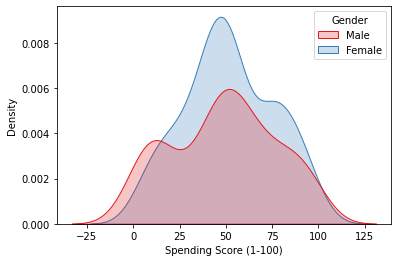

In [98]:
Col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in Col: 
  plt.figure()
  sn.kdeplot(df[i],shade=True, hue=df['Gender'])

Recognizing the Annual income visual above, it seems like there's a tail in the male curve, let's try to visualize in boxplot for more clarification on gender data.

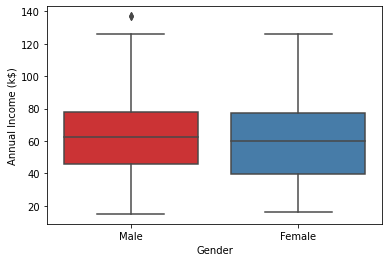

In [100]:
sn.boxplot(data=df,x='Gender',y='Annual Income (k$)');

As we see, there's a higher median value for annual income for male than female income, also seems like there's an outlierin annual income over 130,000$ in the male data.

#### Bivariate Analysis

In [109]:
#df.corr()

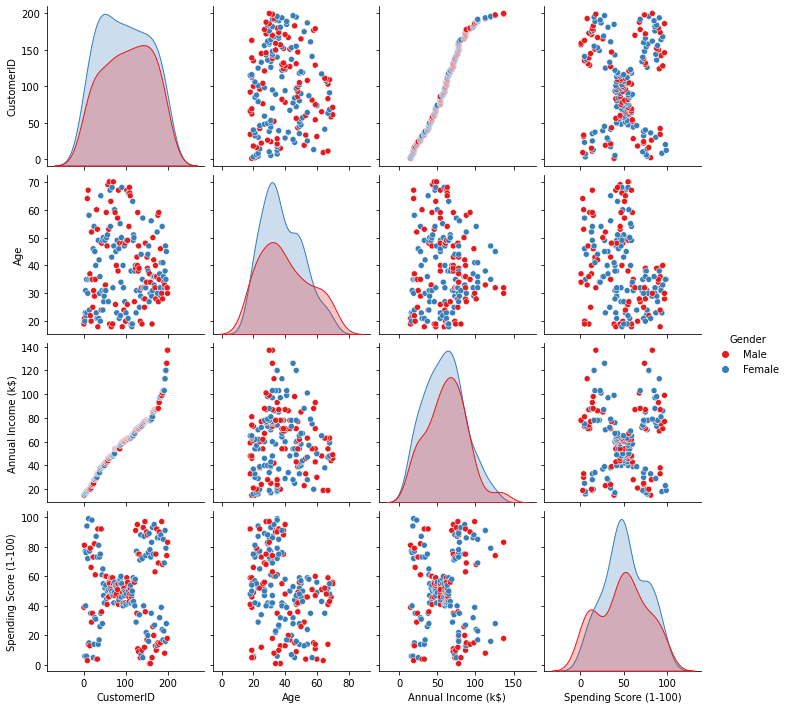

In [110]:
sn.pairplot(df,hue='Gender');

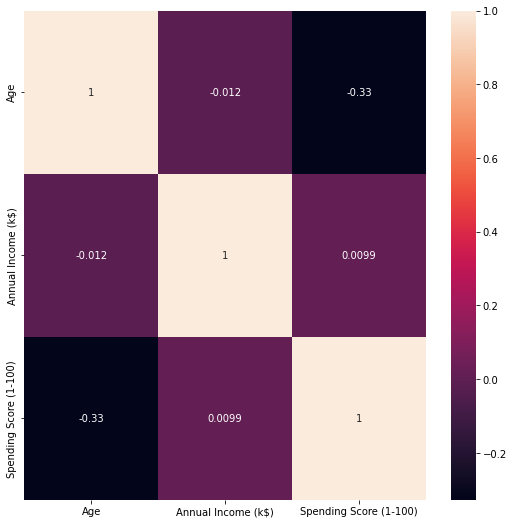

In [112]:
#Correlation Matrix for more clarification, removing Customer_Id
plt.figure(figsize=(9,9))
sn.heatmap(df[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr(),annot=True);

### Clustering

In [113]:
#scaling the dataset but first I will convert the categorical values of Gender column to 0 or 1
#Removing the Customer_Id col
df.drop("CustomerID", axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [116]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [119]:
from pandas.io.formats.style_render import DataFrame
Scaler = StandardScaler()
df_Scaled = Scaler.fit_transform(df)
df_Scaled = DataFrame(df_Scaled, columns=df.columns)
df_Scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [120]:
#Clustering using KMeans
cluster1 = KMeans(n_clusters=6)

In [121]:
cluster1.fit(df_Scaled)

KMeans(n_clusters=6)

In [124]:
cluster1.inertia_

275.79528685662666

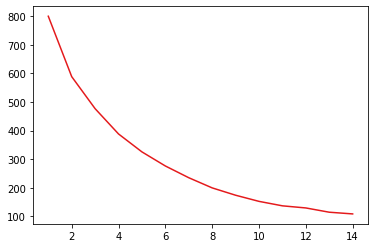

In [127]:
#Finding the best number of clusters to get better inertia score
inertia_scores=[]
for i in range(1,15):
  clusteri=KMeans(n_clusters=i).fit(df_Scaled)
  inertia_scores.append(clusteri.inertia_)
plt.plot(range(1,15),inertia_scores);

In [149]:
cluster2 = KMeans(n_clusters=5).fit(df_Scaled)
cluster2.inertia_

380.2599471465347

In [150]:
df_Scaled['cluster'] = cluster2.labels_
df_Scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster2,cluster
0,1.128152,-1.424569,-1.738999,-0.434801,1,1
1,1.128152,-1.281035,-1.738999,1.195704,1,1
2,-0.886405,-1.352802,-1.700830,-1.715913,5,0
3,-0.886405,-1.137502,-1.700830,1.040418,5,0
4,-0.886405,-0.563369,-1.662660,-0.395980,5,0


In [159]:
Centers= pd.DataFrame(cluster2.cluster_centers_)
Centers.head()

,0,1,2,3,4,5
0,-0.886405,-0.926081,-0.700172,0.281824,5.000000,1.000000e+00
1,1.128152,-0.749226,-0.088905,0.796539,1.000000,2.220446e-16
2,-0.362068,0.517064,0.249994,-0.778878,3.260274,2.000000e+00
3,-0.711226,-0.485361,1.123708,1.210895,2.000000,3.000000e+00
4,1.128152,1.317944,-0.525757,-0.445893,0.000000,-4.440892e-16


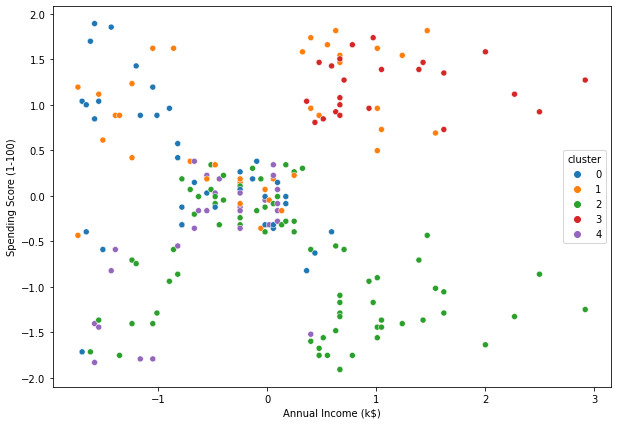

In [194]:
#marker='*')
plt.figure(figsize=(10,7))
sn.scatterplot(data=df_Scaled, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',palette='tab10');

In [167]:
#Since I have no clear vision for clusters, I could make a cluter for only Spending and Income then groupby the gender and age data

In [171]:
Spending_Income_Cluster = KMeans(n_clusters=5)
Spending_Income_Cluster.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =Spending_Income_Cluster.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Spending and Income Cluster
0,1,19,15,39,1,4
1,1,21,15,81,1,3
2,0,20,16,6,4,4
3,0,23,16,77,4,3
4,0,31,17,40,4,4


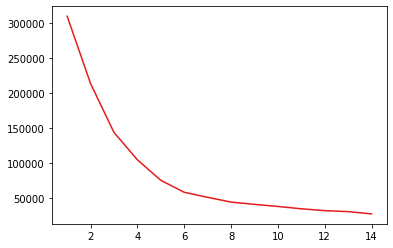

In [172]:
#Finding the best number of clusters to get better inertia score > found best is 5
inertia_scores=[]
for i in range(1,15):
  clusteri=KMeans(n_clusters=i).fit(df)
  inertia_scores.append(clusteri.inertia_)
plt.plot(range(1,15),inertia_scores); 

In [174]:
centers =pd.DataFrame(Spending_Income_Cluster.cluster_centers_)
#centers.head()
centers.columns=['x','y']

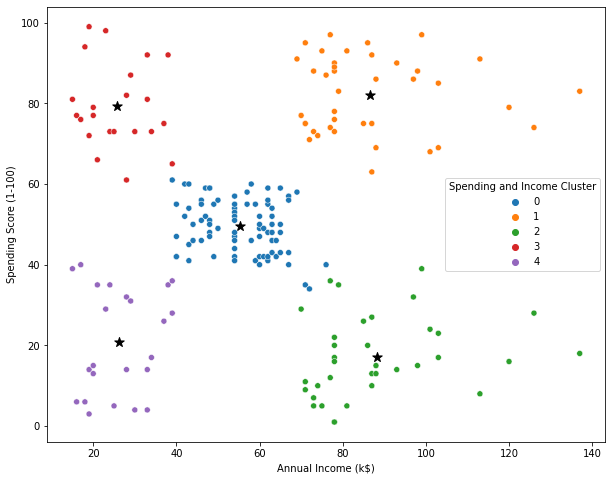

In [193]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sn.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10');

In [184]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index') # 0 is female and 1 is male

Gender,0,1
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [181]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


As we see:
* The recommended cluster to focus on in mall campaigns will be cluster 1, as they are having the most spending score besides the high annual income.
* The majority of ckuster 1 is "Female" customers (almost 53%), while the average age in general amoung people in that cluster is "32" years old.
* Finally, found another group of customers that spend highly despite the low annual income, this group is cluster 3 which is having an average age of "25" years old. I recommend taking this group of customers into consideration as well.